In [11]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from fbprophet import Prophet
from sklearn.metrics import r2_score
import seaborn as sns

plt.style.use("ggplot")

In [2]:
#Importing the Datasets
df0 = pd.read_csv('/content/CONVENIENT_global_confirmed_cases.csv')
df1 = pd.read_csv('/content/CONVENIENT_global_deaths.csv')

In [3]:
world = pd.DataFrame()
country = df0.iloc[:,1:].columns
world['Country'] = country
cases = []
for i in world['Country']:
  cases.append(pd.to_numeric(df0[i][1:].values).sum())
world['Cases'] =  cases
world.head()

,Country,Cases
0,Afghanistan,152363.0
1,Albania,137075.0
2,Algeria,189384.0
3,Andorra,14976.0
4,Angola,45175.0


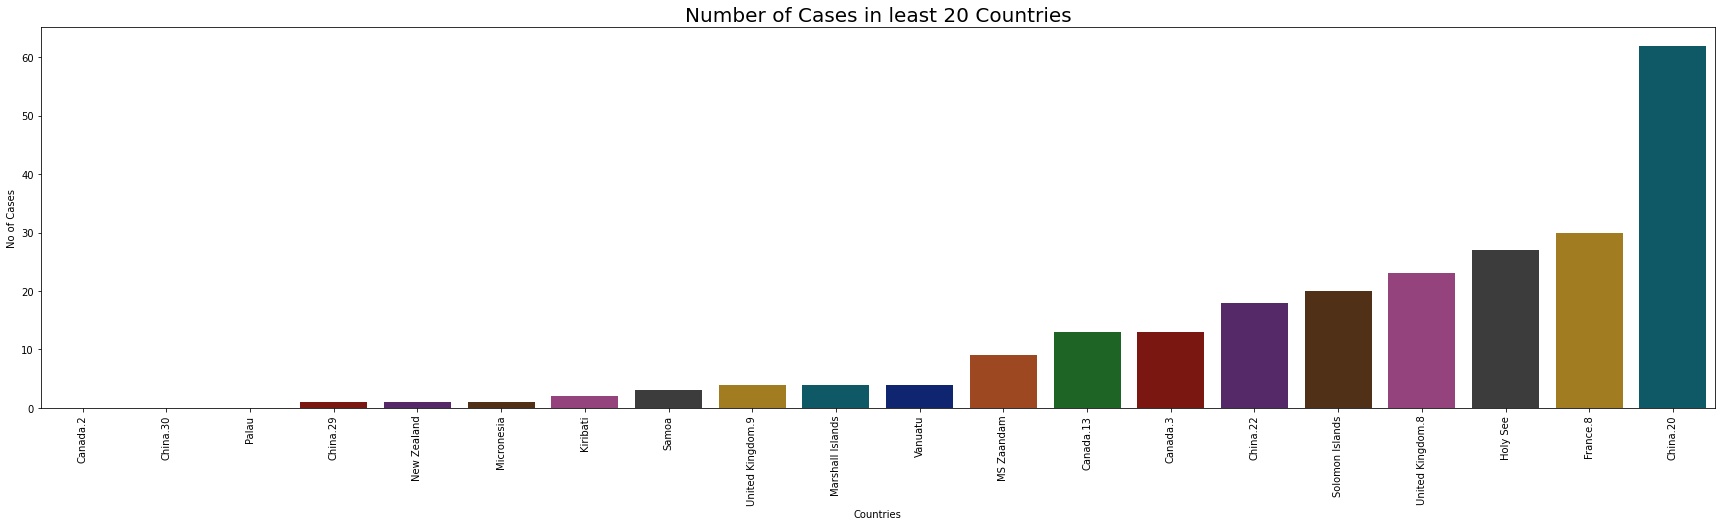

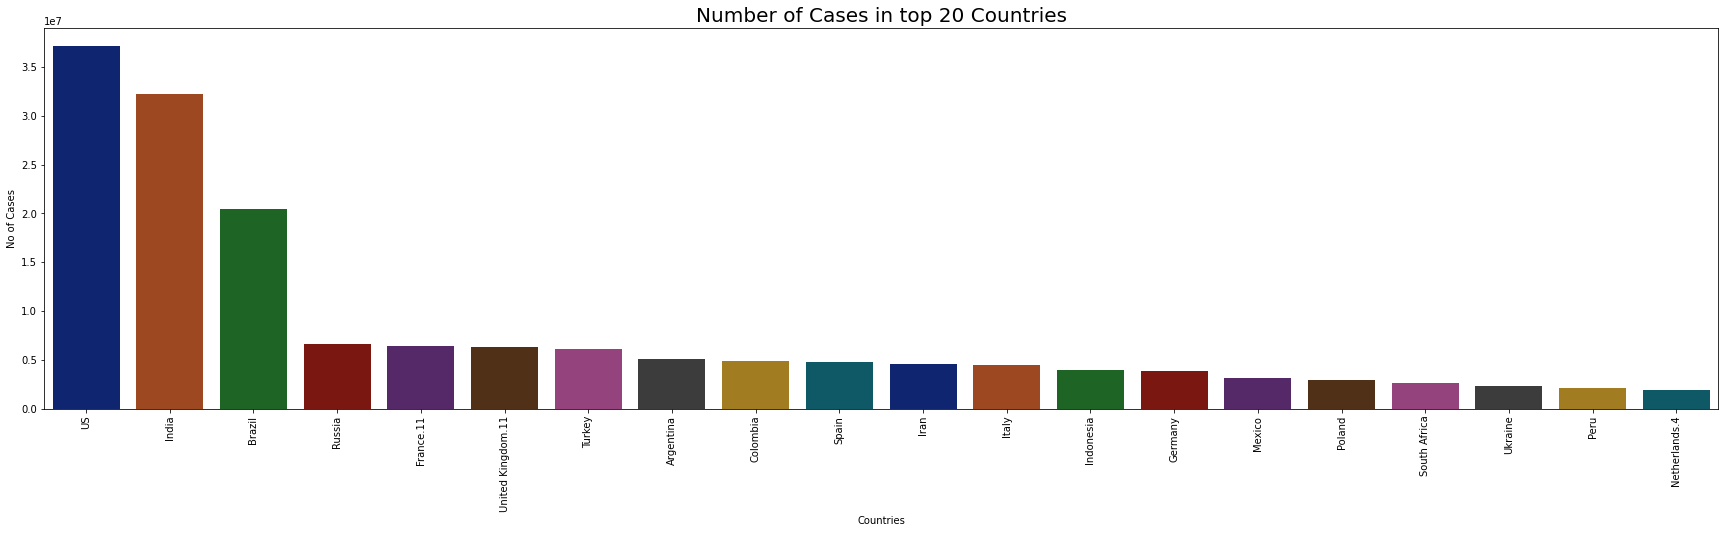

In [4]:
top = world.sort_values(by = 'Cases',ascending = False ,axis = 0,ignore_index= True)
low = world.sort_values(by = 'Cases',ascending = True ,axis = 0,ignore_index= True)
def plott(data,n):
  data = data[:20]
  plt.rcParams['figure.figsize'] = (30, 7)
  ax = sns.barplot(x = data['Country'][:20], y = data['Cases'][:20], palette = 'dark')
  ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
  ax.set_ylabel(ylabel = 'No of Cases', fontsize = 10)
  ax.set_title(label = 'Number of Cases in ' +n +' 20 Countries', fontsize = 20)
  plt.xticks(rotation = 90)
  plt.show()
# No. of Cases in Top and least countries
plott(low,n = 'least')
plott(top,n = 'top')

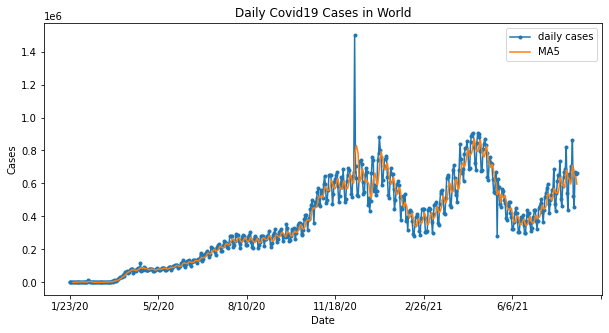

In [5]:
#Plotting the daily cases in the world
count = []
for i in range(1,len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = df0["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

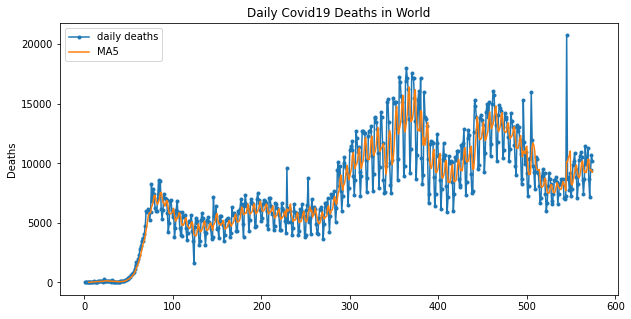

In [6]:
#Plotting the daily covid deaths in the world
deathdf = pd.DataFrame()
count = []
for i in range(1,len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))
deathdf["Date"] = df0["Country/Region"][1:]
deathdf["Deaths"] = count

deathdf.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(10,5),label="daily deaths")
deathdf.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

In [7]:
#Using Facebook Prophet Model.

class Fbprophet(object):
  def fit(self,data):
    self.data = data
    self.model = Prophet(yearly_seasonality=True,daily_seasonality=True)
    self.model.fit(self.data)
  def forecast(self,periods,freq):
    self.future = self.model.make_future_dataframe(periods=periods,freq = freq)
    self.df_forecast =self.model.predict(self.future)
  def plot(self,xlabel="Years",ylabel="Values"):
    self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
    self.model.plot_components(self.df_forecast,figsize=(9,6))
  def score(self):
    print('Accuracy is ',r2_score(self.data.y,self.df_forecast.yhat[:len(df)])*100)


df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values
model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.score()




INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Accuracy is  90.44025924716273


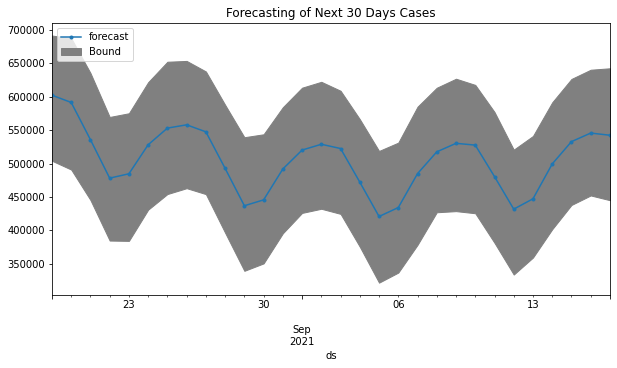

In [8]:
#Forecasting of Next 30 Days Cases
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()